In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Car_sale_ads.csv")


Data Cleaning

First We get rid off columns we are not going to use

In [3]:
df.drop(['Offer_location','First_registration_date','Origin_country','Vehicle_generation','Vehicle_version','CO2_emissions','First_owner'], axis = 1, inplace = True) 


First We plot to try to find the outliers for each column and drop them

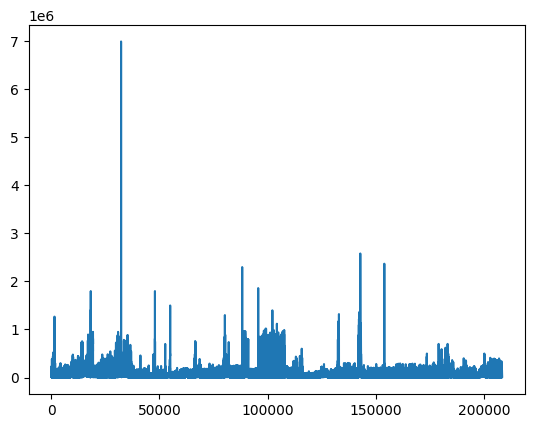

In [4]:
plt.plot(df['Price'])

After Plotting the price column we found that there is one value that didn't make sense so we will drop it

In [5]:
max_Price = df['Price'].idxmax()
df.loc[max_Price]

Index                                                                 32304
Price                                                               6999000
Currency                                                                PLN
Condition                                                              Used
Vehicle_brand                                                           BMW
Vehicle_model                                                            X3
Production_year                                                        2014
Mileage_km                                                         238000.0
Power_HP                                                              190.0
Displacement_cm3                                                     2000.0
Fuel_type                                                            Diesel
Drive                                                       4x4 (permanent)
Transmission                                                      Automatic
Type        

In [6]:
df.drop(index=max_Price, axis=0, inplace=True) 


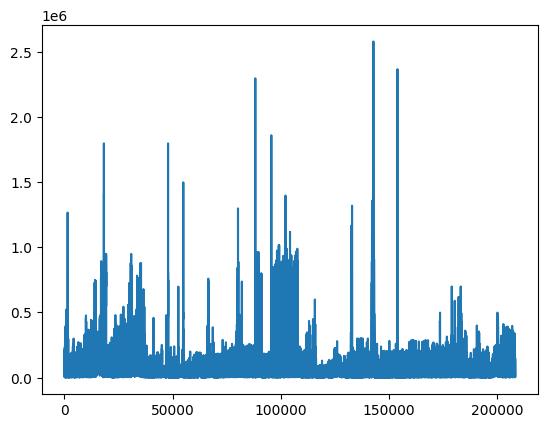

In [7]:
plt.plot(df['Price'])


We won't drop any other values as the price is mostly dependent on the vechicle brand and other columns so it won't be accurate

We will now remove the vechicles that has a production year less than or equal 1980 

Production year before dropping the rows

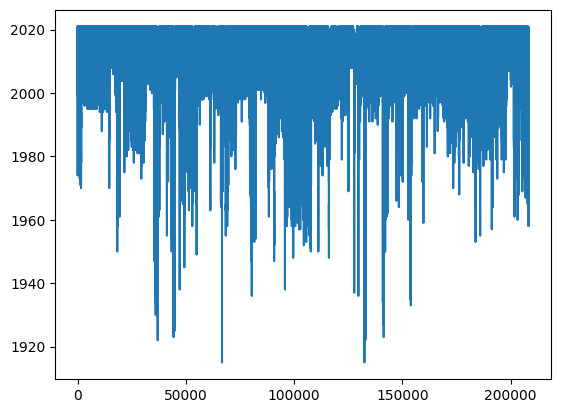

In [8]:
plt.plot(df['Production_year'])

In [9]:
df = df.drop(df[df.Production_year <= 1980].index)


Production year after dropping the rows

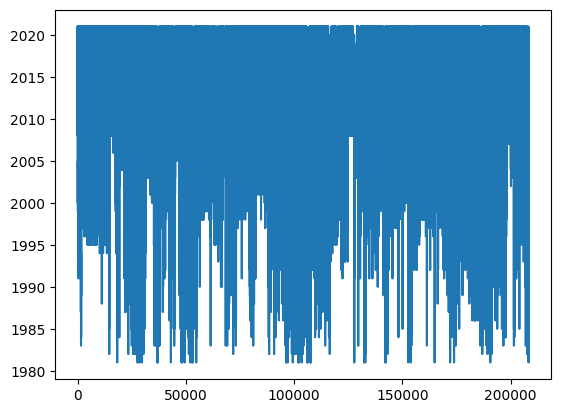

In [10]:
plt.plot(df['Production_year'])

Now we will remove any Vehicle that has more than 500k mileage

Before removing outliers

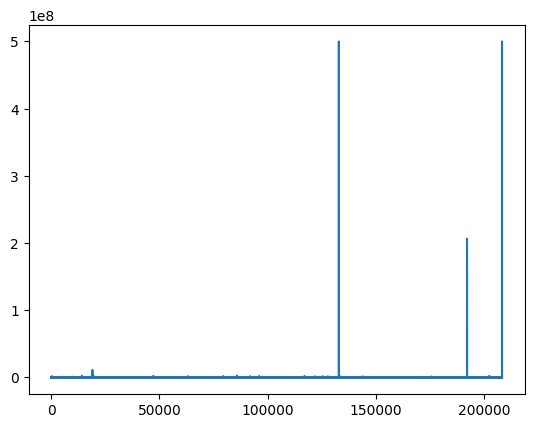

In [11]:
plt.plot(df['Mileage_km'])

In [12]:
df = df.drop(df[df.Mileage_km >= 500000].index)


After removing outliers

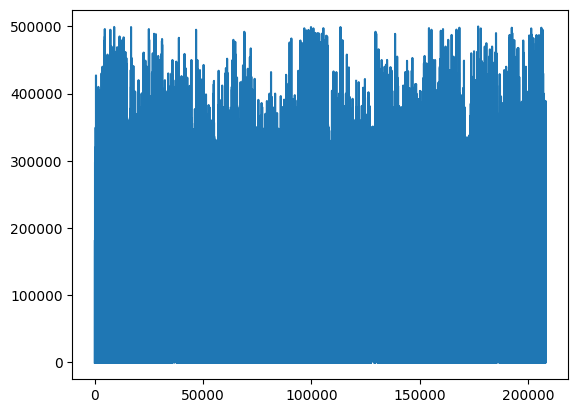

In [13]:
plt.plot(df['Mileage_km'])


Now will remove the vehicles that has a horse power greater than 800 or samller than 50

Before removing outliers

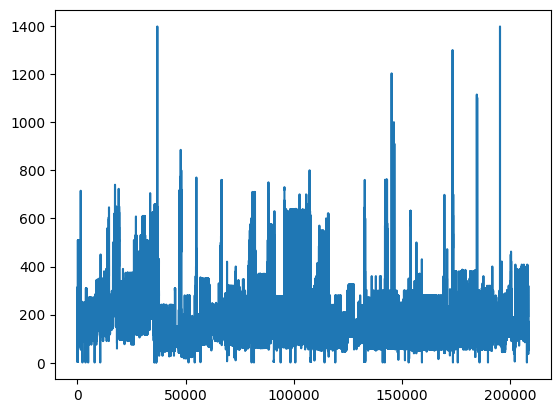

In [14]:
plt.plot(df['Power_HP'])

In [15]:
df = df.drop(df[df.Power_HP >= 800].index)

In [16]:
df = df.drop(df[df.Power_HP <= 50].index)

After removing outliers

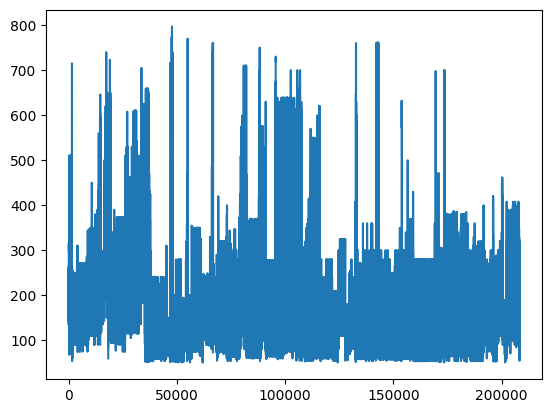

In [17]:
plt.plot(df['Power_HP'])

After seeing the plot for the displacement_cm3 column we found that removing any values won't be nessacary as the values are almost all close

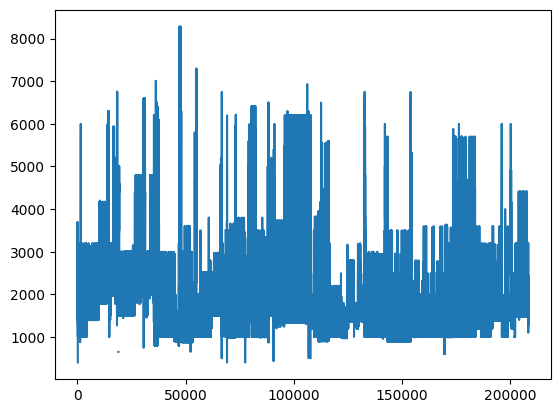

In [18]:
plt.plot(df['Displacement_cm3'])

Now we will remove the outliers for the doors_number that are grater than 7 and samller than 2

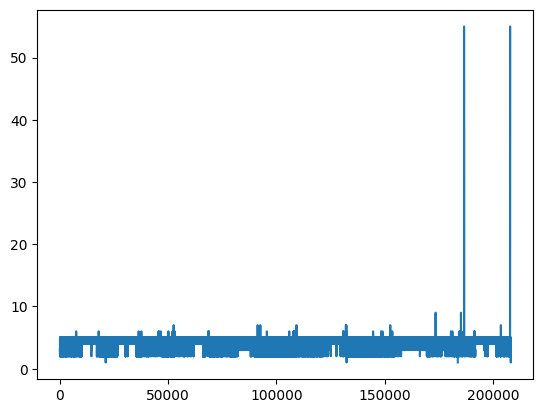

In [19]:
plt.plot(df['Doors_number'])

In [20]:
df = df.drop(df[df.Doors_number > 7].index)

In [21]:
df = df.drop(df[df.Doors_number < 2].index)

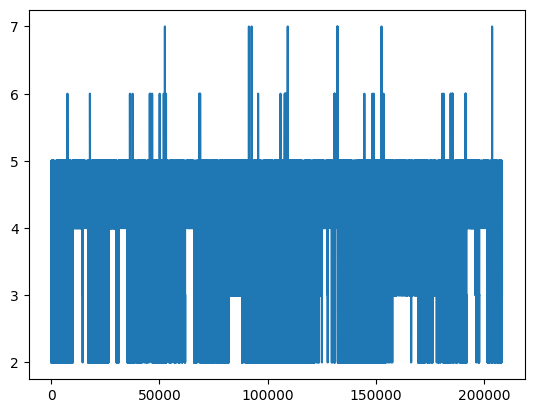

In [22]:
plt.plot(df['Doors_number'])

We will remove every vehicle brand that has only 10 ads or less

In [23]:
df = df[df.groupby('Vehicle_brand').Vehicle_brand.transform('count')>10]


Now we will fill the null values in the drive column based on the vehicle brand mode in the drive column

In [24]:
vehicleBrands = df['Vehicle_brand'].unique()
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMode = df.loc[brand]['Drive'].mode()

    rows = df.loc[brand]
    rows.loc[rows['Drive'].isnull(),'Drive'] = brandMode[0]
    
    df.loc[brand,'Drive'] = rows

Now we will fill the null values in the Transmission column based on the vehicle brand mode in the Transmission column

In [25]:
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMode = df.loc[brand]['Transmission'].mode()

    rows = df.loc[brand]
    rows.loc[rows['Transmission'].isnull(),'Transmission'] = brandMode[0]
    
    df.loc[brand,'Transmission'] = rows

Now we will change the null values of the doors number column based on the mode of the doors number column

In [26]:
doorsMode = df['Doors_number'].mode()[0]
df['Doors_number'] = df['Doors_number'].fillna(doorsMode)

Now We will change the null values of the Mileage_km column to the mean of the column based on a the brand of the null row

In [27]:
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMean = df.loc[brand]['Mileage_km'].mean()

    rows = df.loc[brand]
    rows.loc[rows['Mileage_km'].isnull(),'Mileage_km'] = brandMean
    
    df.loc[brand,'Mileage_km'] = rows

Now We will change the null values of the Power_HP column to the mean of the column based on a the brand of the null row

In [28]:
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMean = df.loc[brand]['Power_HP'].mean()

    rows = df.loc[brand]
    rows.loc[rows['Power_HP'].isnull(),'Power_HP'] = brandMean
    
    df.loc[brand,'Power_HP'] = rows

Now We will change the null values of the Displacement_cm3 column to the mean of the column based on a the brand of the null row

In [29]:
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMean = df.loc[brand]['Displacement_cm3'].mean()

    rows = df.loc[brand]
    rows.loc[rows['Displacement_cm3'].isnull(),'Displacement_cm3'] = brandMean
    
    df.loc[brand,'Displacement_cm3'] = rows

We took every value of cars that are new that had a mileage greater than 10 and made them = to a radnom number from 1 to 10 since any number below 10km is considered new

In [30]:
new_condition = df['Condition']== 'New'

conditon_new_rows = df.loc[new_condition]

conditon_new_rows.loc[conditon_new_rows['Mileage_km'] >10,'Mileage_km'] = 10
    
df.loc[new_condition,'Mileage_km'] = conditon_new_rows


Data Analysing

Question 1: After how many mileage is a car considered used?

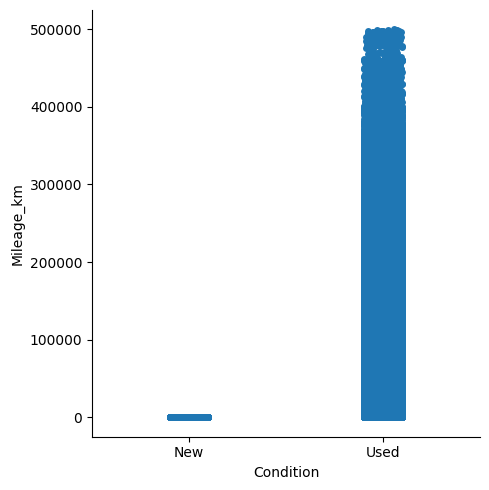

In [31]:
sns.catplot(data=df,x="Condition",y="Mileage_km")

<AxesSubplot: xlabel='Condition', ylabel='Mileage_km'>

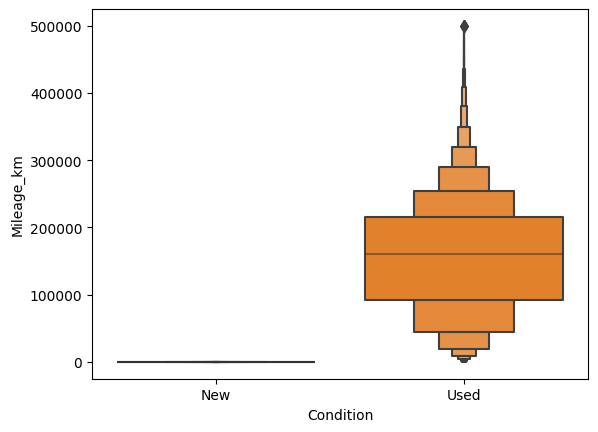

In [32]:
sns.boxenplot(data=df,x="Condition",y="Mileage_km")

As we saw the first plot show that after about 10 km a car is considered used and the second plot shows us that most of the used cars mileage values range from 100k km to 200k km

Question 2: When the year increases the price increases in top 5 brands ?

In [33]:
top_5_brands = df['Vehicle_brand'].value_counts()[:5].index.tolist()

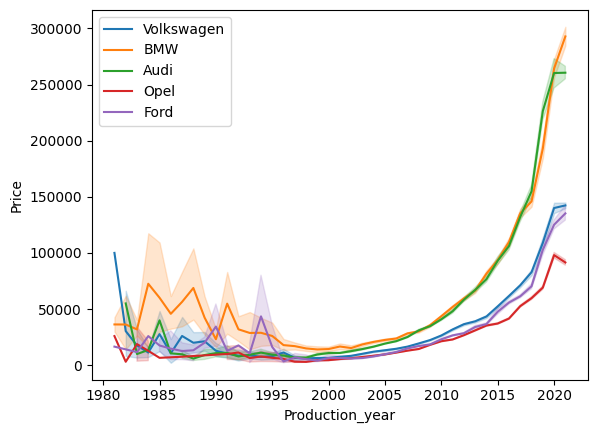

In [34]:
for i in range(len(top_5_brands)):
    brand = df['Vehicle_brand']== top_5_brands[i]
    rows = df.loc[brand]
    sns.lineplot(x='Production_year',y= 'Price',data= rows,label =top_5_brands[i])
    

1- As shown in the graph BMW has the highest price increase along with the year

2- Starting from the 2000 the prices start to increase gradually and in order 

3- Before the 2000 thr price changes were unstable due to some people liking antique cars so even though they are old cars they preserve a higher value

Question 3: When Power_HP increases the Displacement_cm3 increases with top 5 brands?

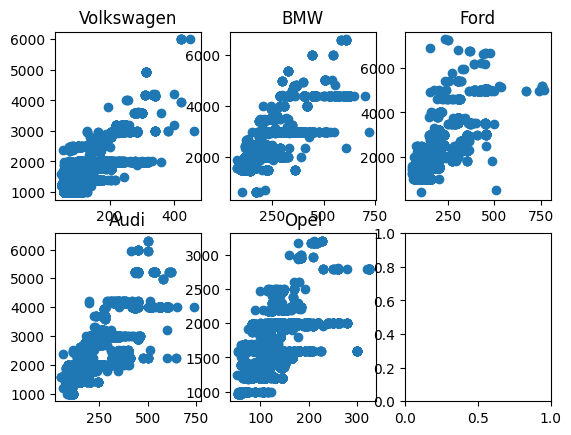

In [35]:
figure,axis= plt.subplots(2,3)
rows = []
for i in range(len(top_5_brands)):
    brand = df['Vehicle_brand']== top_5_brands[i]
    rows.append(df.loc[brand])
    
axis[0,0].scatter(rows[0]['Power_HP'],rows[0]['Displacement_cm3'])
axis[0, 0].set_title(top_5_brands[0])

axis[0,1].scatter(rows[1]['Power_HP'],rows[1]['Displacement_cm3'])
axis[0,1].set_title(top_5_brands[1])

axis[1,0].scatter(rows[2]['Power_HP'],rows[2]['Displacement_cm3'])
axis[1,0].set_title(top_5_brands[2])

axis[1,1].scatter(rows[3]['Power_HP'],rows[3]['Displacement_cm3'])
axis[1,1].set_title(top_5_brands[3])

axis[0,2].scatter(rows[4]['Power_HP'],rows[4]['Displacement_cm3'])
axis[0,2].set_title(top_5_brands[4])

plt.show()


As shown in the data above as the HorsePower increases the displacement tends to increase

Question 4: when the Mileage increases the Price decreases? 

<AxesSubplot: xlabel='Mileage_km', ylabel='Price'>

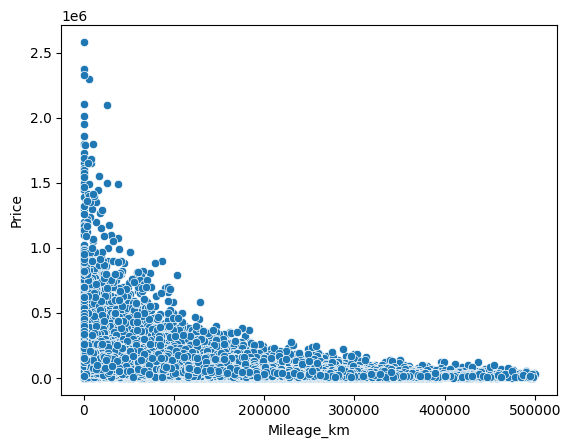

In [36]:
sns.scatterplot(x='Mileage_km',y= 'Price',data = df)

As proven by the graph above this shows that when the vehicle travels for a longer distance its value decreases 

Question 5: How does the Type of car affect the Power_HP of the vehicle?

<AxesSubplot: xlabel='Power_HP', ylabel='Type'>

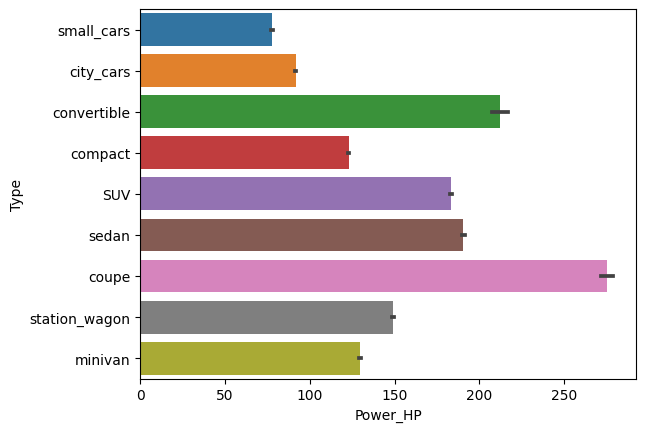

In [37]:
sns.barplot(data=df,y="Type",x="Power_HP")

From the graph shown above we can observe that 'coupe' car type has the highest HorsePower and 'Small Cars' have the least HorsePower

Question 6: How does the Type of car affect the Drive of the car?

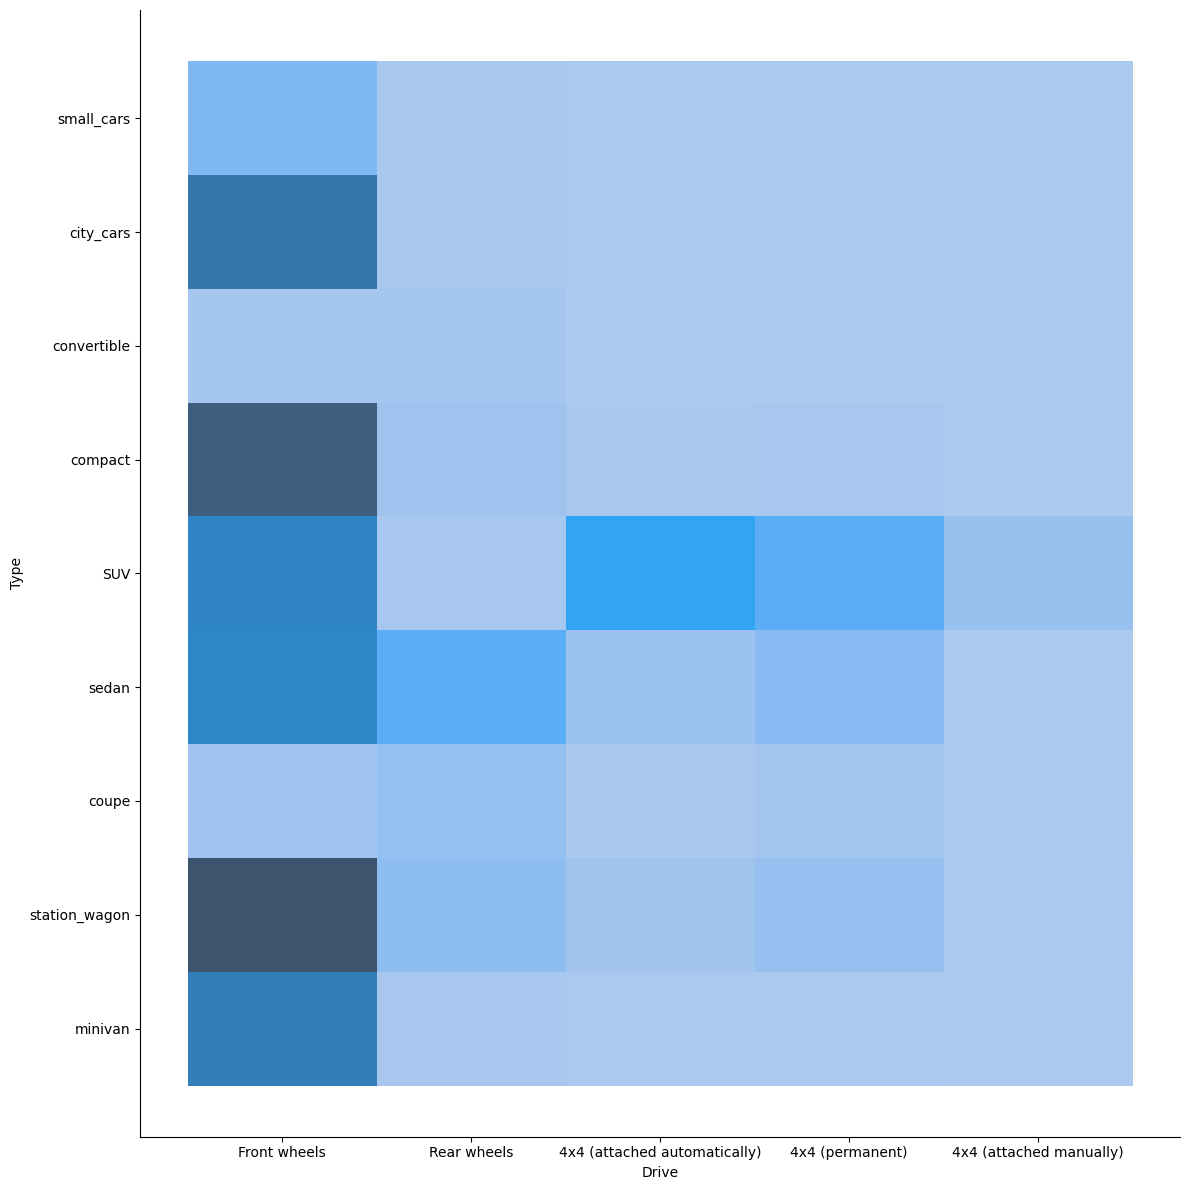

In [38]:
# sns.set(rc = {'figure.figsize':(15,8)})
sns.displot(data=df,y="Type",x="Drive", height= 12)



1-The figure shown above shows that most cars use the Front wheels to drive
 
2- SUV vary the most as it has almost equal usage for all the different wheel types

Here is a nice easter egg

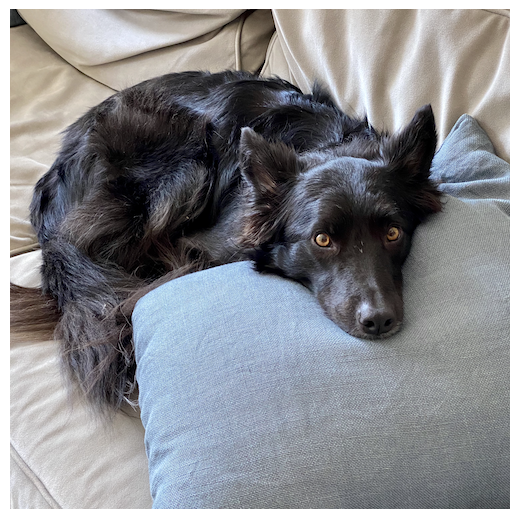

In [46]:
sns.dogplot(data=df,x="Type",y="Production_year")